In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.cluster import MeanShift
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

In [75]:
# Bug in VS Code makes you change the directory
base_path = '/home/petehillyard/xandem_projects/personal_research'
os.chdir(base_path + '/ml-exploration/iris')
df = pd.read_csv('data/bezdekIris.data')
df.head(3)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


# Pairwise relationships
We'll start by looking at pairwise relationships between features.

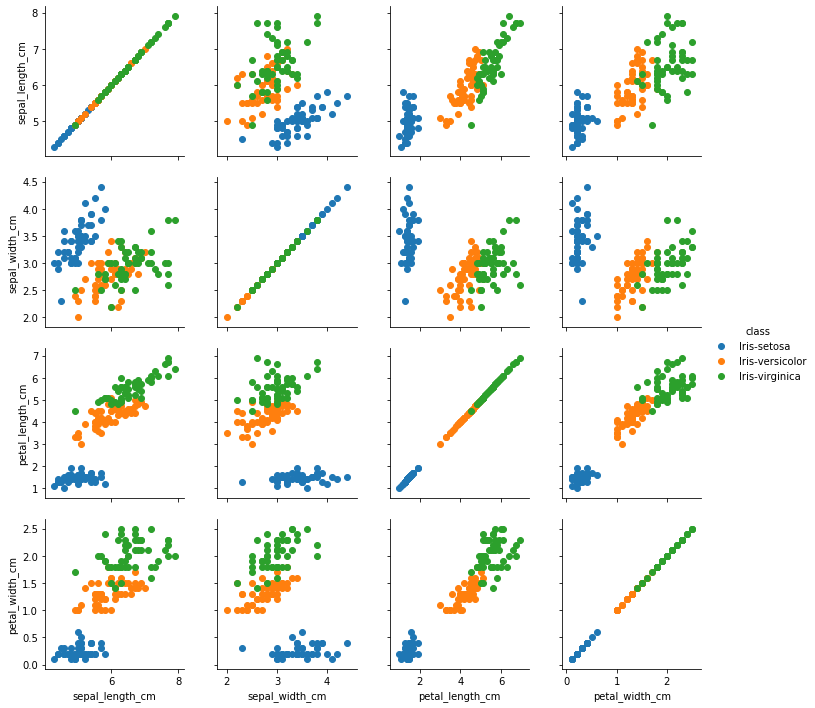

In [76]:
g = sns.PairGrid(df, hue='class');
g = g.map(plt.scatter);
g = g.add_legend()

## Clustering with no knowledge of the number of classes
Let's start by thinking about what will happen if we try to use a clustering algorithm that does not know the number of classes. It's pretty evident from the plots that a clustering algorithm will be able to perfectly cluster the Iris-setosa based on `petal_length_cm` and `petal_width_cm`. This class, using these two features, is linearly separable from Iris-versicolor and Iris-virginica. Yet, it doesn't look like there would be a clustering algorithm that could separate Iris-versicolor and Iris-virginica. No matter which feature is chosen, this is significant overlap in the data and there doesn't appear to be two distinct modes. A clustering algorithm (with no knowledge of the number of classes) is looking for distinct groups of data with either enough mass near the mean or enough separation between groups to cut a line between the data. Let's implement a few of these clustering algorithms to see how they do.

### Run mean shift
We'll start by running the mean shift clustering algorithm.

In [116]:
d = {key: df[key] for key in ['petal_width_cm', 'petal_length_cm', 'class']}
df_p = pd.DataFrame(data=d)
X = df_p[['petal_length_cm', 'petal_width_cm']].values
tfrm = RobustScaler().fit(X)
Xsc = xfrm.transform(X)
dsc = {'petal_width_cm': Xsc[:, 0], 'petal_length_cm': Xsc[:, 1], 'class': df_p['class']}
df_p_sc = pd.DataFrame(data=dsc)

clustering = MeanShift(bandwidth=0.25).fit(Xsc)

print(clustering.labels_)
df_p_sc['cluster'] = clustering.labels_
print(clustering.get_params())

# Questions to answer
# How does scaling and bandwidth affect performance
a = dict()
for row in df_p_sc[['cluster', 'class']].values:
    tmp = (row[0], row[1])
    if tmp in a.keys():
        a[tmp] += 1
    else:
        a[tmp] = 1
print(a)

# sns.relplot(x='petal_width_cm', y='petal_length_cm', hue='class', data=df_p_sc);
# sns.relplot(x='petal_width_cm', y='petal_length_cm', hue='cluster', data=df_p_sc);

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{'bandwidth': 0.25, 'bin_seeding': False, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': None, 'seeds': None}
{(0, 'Iris-setosa'): 50, (1, 'Iris-versicolor'): 49, (2, 'Iris-versicolor'): 1, (2, 'Iris-virginica'): 46, (1, 'Iris-virginica'): 4}


### Run Affinity

### Run agglomeritive


### Run DBSCAN

### Run OPTICS

### Run Birch

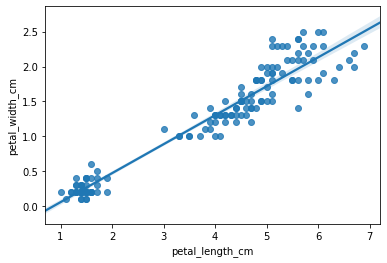

In [78]:
sns.regplot(x='petal_length_cm', y='petal_width_cm', data=df);

After the 

In [79]:
mx = np.max(df[df['class'] == 'Iris-setosa']['petal_length_cm'])
mn = np.min(df[df['class'] == 'Iris-versicolor']['petal_length_cm'])
print(mx, mn, mn-mx)

1.9 3.0 1.1


In [80]:
y = df['petal_width_cm']
x = df['petal_length_cm']
r = y / np.sin(np.arctan(y / x))
d = {'r': r, 'h': np.zeros(df.shape[0]), 'class': df['class']}
dfr = pd.DataFrame(data=d)
mx = np.max(dfr[dfr['class'] == 'Iris-setosa']['r'])
mn = np.min(dfr[dfr['class'] == 'Iris-versicolor']['r'])
print(mx, mn, mn-mx)

1.9416487838947596 3.1953090617340916 1.253660277839332


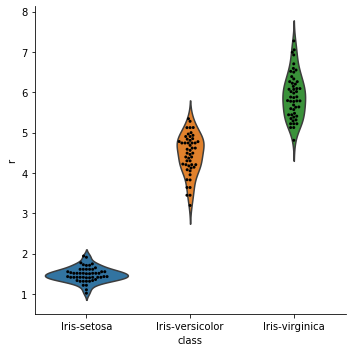

In [81]:
g = sns.catplot(x='class', y='r', kind='violin', inner=None, data=dfr);
sns.swarmplot(x='class', y='r', color='k', size=3, data=dfr, ax=g.ax);

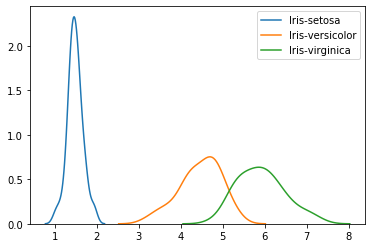

In [82]:
for c in pd.unique(dfr['class']):
    sns.kdeplot(dfr[dfr['class'] == c]['r'], label=c);

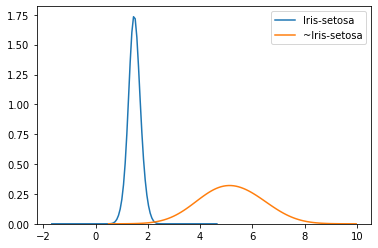

In [83]:
bw = 0.9
sns.kdeplot(dfr[dfr['class'] == 'Iris-setosa']['r'], bw=bw, label='Iris-setosa');
sns.kdeplot(dfr[dfr['class'] != 'Iris-setosa']['r'], bw=bw, label='~Iris-setosa');

In [84]:
X = df['petal_length_cm'].values[np.newaxis].T
y = df['petal_width_cm'].values[np.newaxis].T
print(X.shape, y.shape)
reg = LinearRegression().fit(X, y)
print(reg.coef_.flatten(), reg.intercept_)

(150, 1) (150, 1)
[0.41575542] [-0.36307552]


In [85]:
feature_set = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
X = df[feature_set]
transformer = RobustScaler().fit(X)

result = mean_shift(transformer.transform(X))
print(a)

for ii, c in enumerate(result[1]):
    if c == 0:
        print(df['class'].iloc[ii])

NameError: name 'a' is not defined

In [0]:
result = dbscan(transformer.transform(X))
print(a)

for ii, c in enumerate(result[1]):
    if c == 1:
        print(df['class'].iloc[ii])